In [1]:
import polars as pl

file = 'https://raw.githubusercontent.com/vera-institute/incarceration-trends/refs/heads/main/incarceration_trends_state.csv'

data = pl.read_csv(file, infer_schema_length=300)

data

year,state_abbr,state_name,state_fips,region,division,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,white_pop_15to64,aapi_female_pop_15to64,black_female_pop_15to64,latinx_female_pop_15to64,native_female_pop_15to64,white_female_pop_15to64,aapi_male_pop_15to64,black_male_pop_15to64,latinx_male_pop_15to64,native_male_pop_15to64,white_male_pop_15to64,total_incarceration,total_incarceration_rate,held_in_jail,total_jail_pop,female_jail_pop,male_jail_pop,aapi_jail_pop,black_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,total_jail_from_prison,total_jail_adm,…,total_prison_pop_rate,total_prison_jur_pop_rate,female_prison_pop_rate,male_prison_pop_rate,aapi_prison_pop_rate,black_prison_pop_rate,latinx_prison_pop_rate,native_prison_pop_rate,white_prison_pop_rate,aapi_female_prison_pop_rate,black_female_prison_pop_rate,latinx_female_prison_pop_rate,native_female_prison_pop_rate,white_female_prison_pop_rate,aapi_male_prison_pop_rate,black_male_prison_pop_rate,latinx_male_prison_pop_rate,native_male_prison_pop_rate,white_male_prison_pop_rate,total_prison_adm_rate,female_prison_adm_rate,male_prison_adm_rate,aapi_prison_adm_rate,black_prison_adm_rate,latinx_prison_adm_rate,native_prison_adm_rate,white_prison_adm_rate,aapi_female_prison_adm_rate,black_female_prison_adm_rate,latinx_female_prison_adm_rate,native_female_prison_adm_rate,white_female_prison_adm_rate,aapi_male_prison_adm_rate,black_male_prison_adm_rate,latinx_male_prison_adm_rate,native_male_prison_adm_rate,white_male_prison_adm_rate
i64,str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024,"""AK""","""Alaska""",2,"""West""","""Pacific""",484376,224281,260095,44427,21821,37108,77627,303393,22686,8891,16873,37373,138458,21741,12930,20235,40254,164935,null,null,39.0,null,null,null,null,null,null,null,null,null,null,…,917.469074,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2023,"""AK""","""Alaska""",2,"""West""","""Pacific""",484376,224281,260095,44427,21821,37108,77627,303393,22686,8891,16873,37373,138458,21741,12930,20235,40254,164935,null,null,39.0,null,null,null,null,null,null,null,null,null,null,…,926.346475,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2022,"""AK""","""Alaska""",2,"""West""","""Pacific""",484376,224281,260095,44427,21821,37108,77627,303393,22686,8891,16873,37373,138458,21741,12930,20235,40254,164935,4778.0,986.42377,39.0,2934.0,335.0,2599.0,null,null,null,null,2305.0,null,1521.0,…,310.709036,986.42377,33.440193,549.799112,495.194364,2043.902663,326.07524,2408.955647,573.513562,83.752094,224.946575,53.339655,505.71268,122.780916,924.520491,3294.663573,553.496417,4175.982511,951.890139,314.012255,139.111204,464.830158,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021,"""AK""","""Alaska""",2,"""West""","""Pacific""",486916,225591,261325,44109,21813,36553,77714,306727,22457,8889,16643,37490,140112,21652,12924,19910,40224,166615,4639.0,952.731067,40.0,3076.0,357.0,2719.0,null,null,null,null,2420.0,null,1457.0,…,320.999926,952.731067,37.678808,565.57926,573.579088,2131.756292,341.969195,2386.957305,617.813235,89.059091,269.996625,84.11945,469.458522,144.884093,1076.113061,3412.256267,557.50879,4174.124901,1015.51481,299.230257,94.41866,476.035588,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2020,"""AK""","""Alaska""",2,"""West""","""Pacific""",488623,226819,261804,43920,21707,35801,77565,309630,22371,8897,16333,37569,141

/home/dedmonds/repos/code/eda/venv/lib/python3.13/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 32 rows containing missing values.


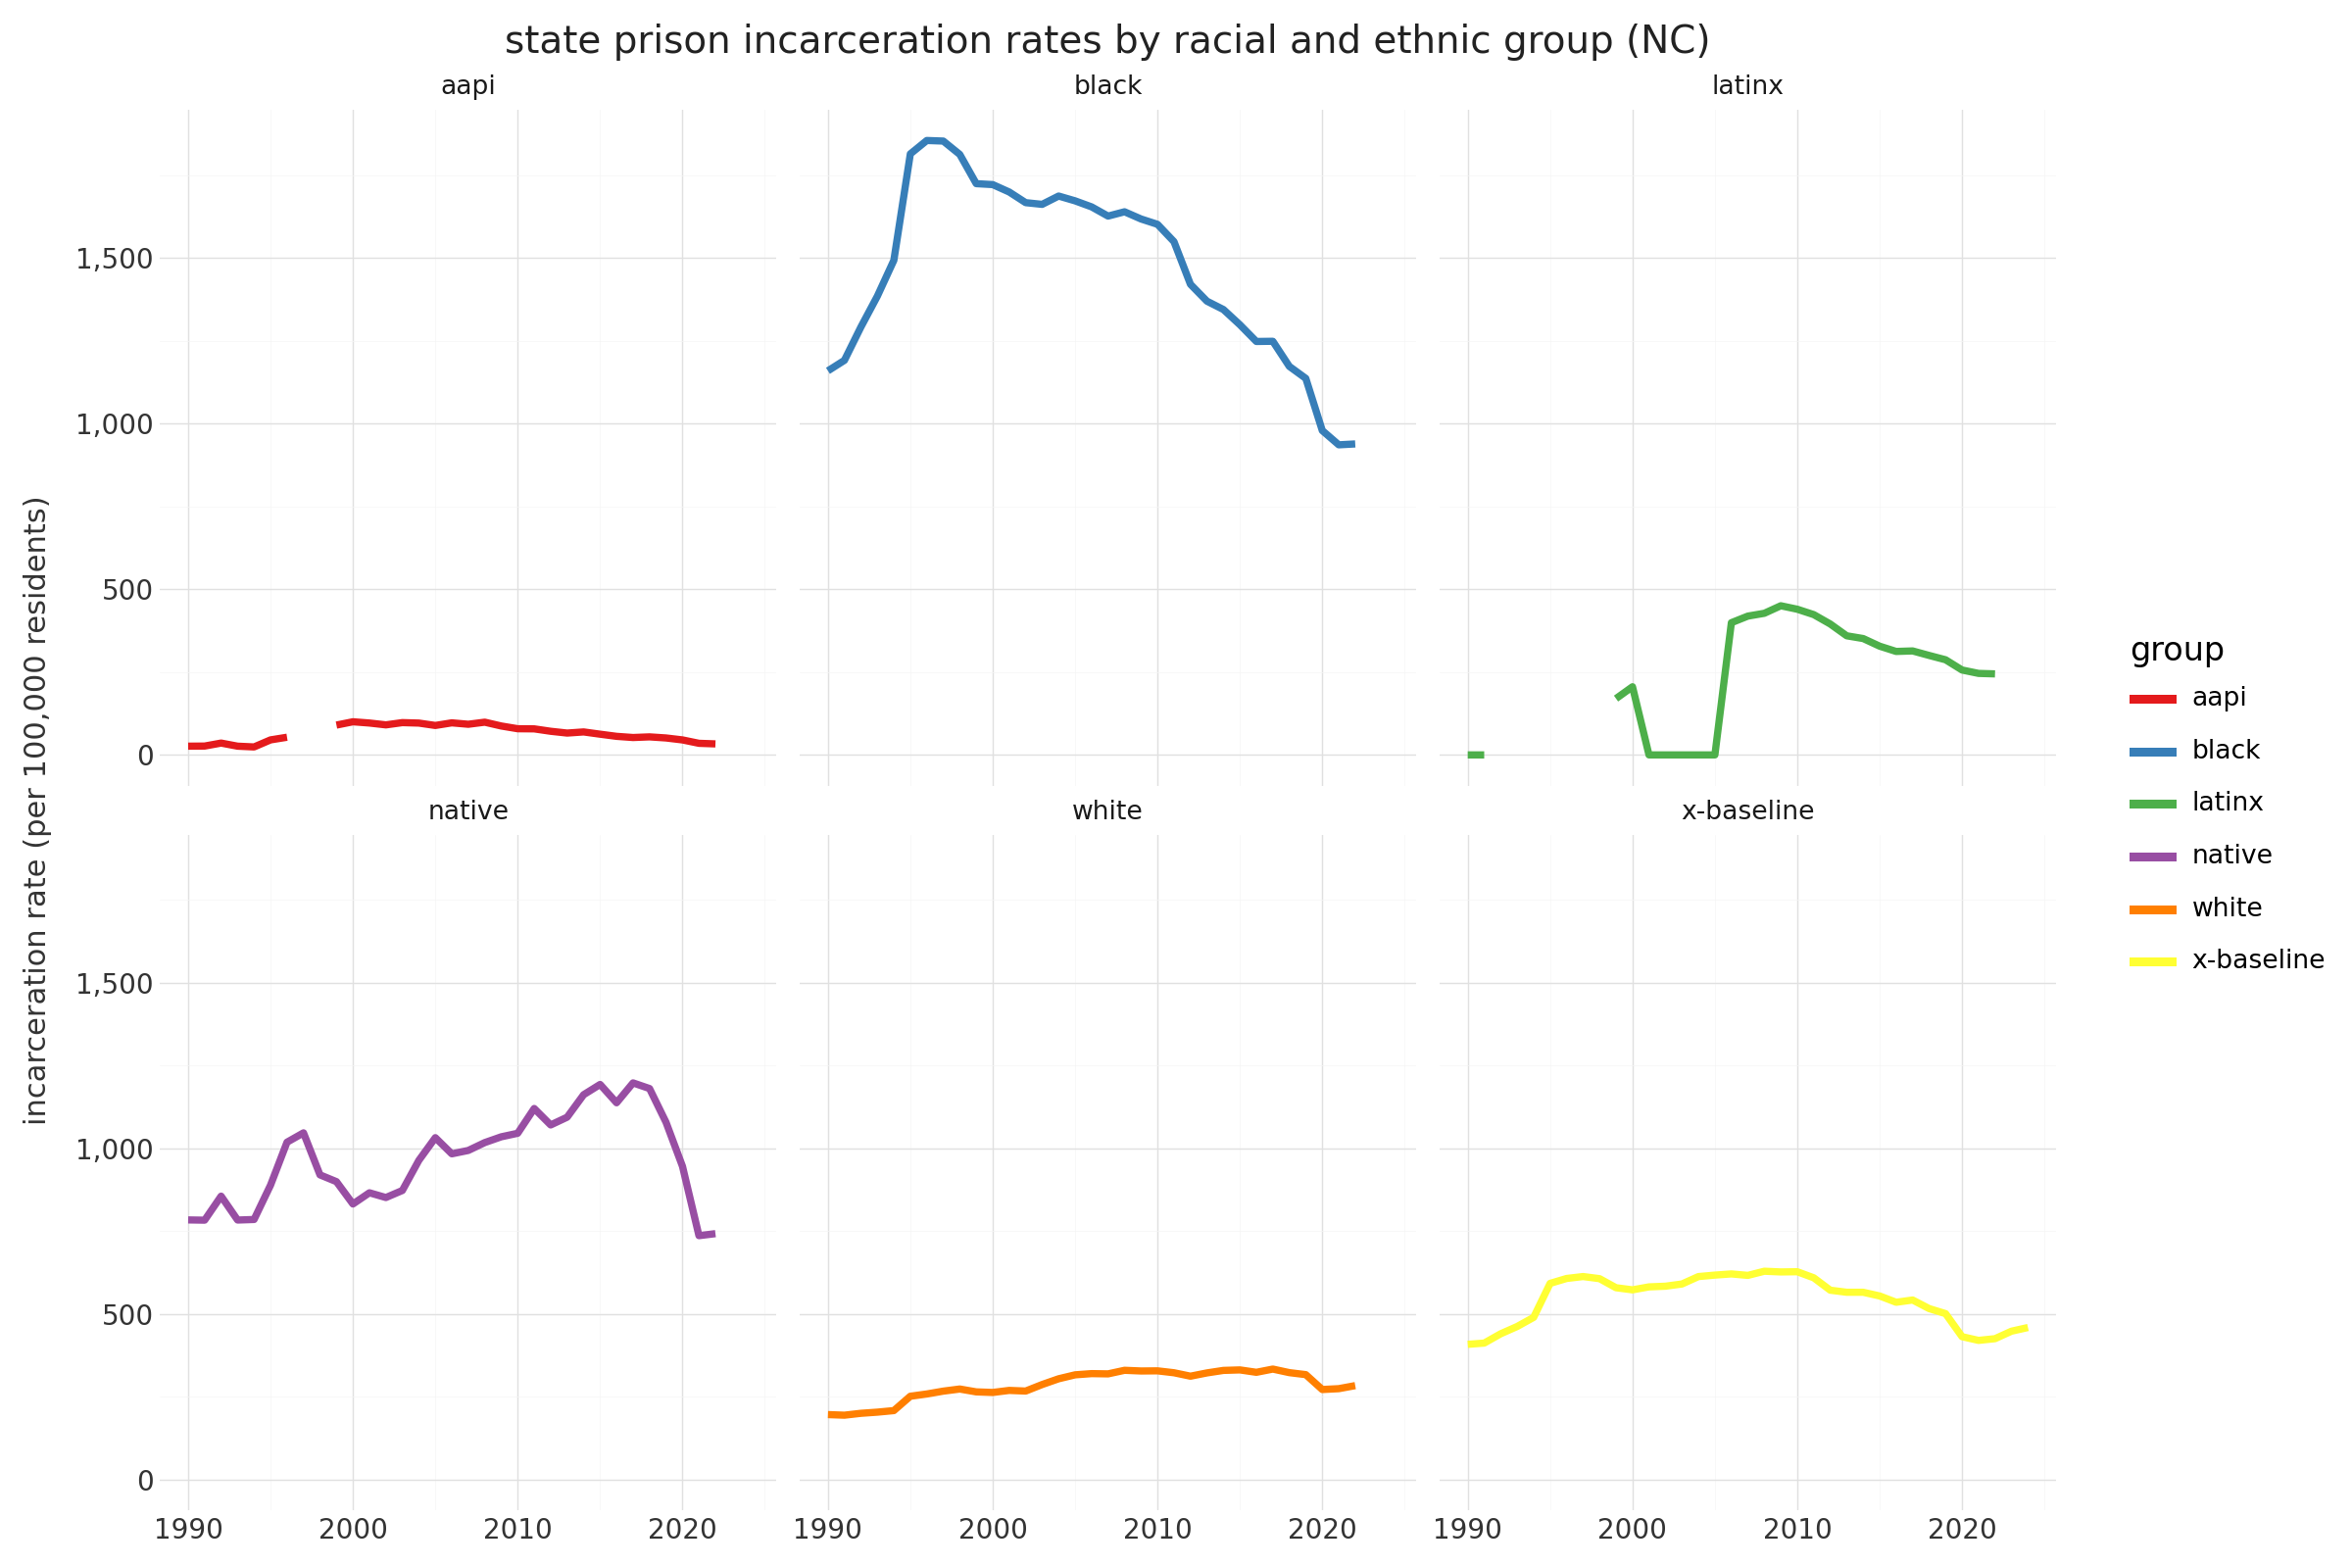

In [40]:
from plotnine import (
    ggplot,
    aes,
    geom_line,
    scale_x_continuous,
    scale_y_continuous,
    facet_wrap,
    labs,
    theme,
    theme_minimal,
    element_text,
    element_line,
    scale_color_brewer,
    scale_color_manual,
)

from mizani.formatters import comma_format

bbc_style_theme = (
    theme_minimal(base_family="DejaVu Sans", base_size=12)
    + theme(
        panel_grid_major=element_line(color="#e0e0e0", size=0.5),
        panel_grid_minor=element_line(color="#f5f5f5", size=0.25),
        axis_title=element_text(size=11, color="#333333"),
        axis_text=element_text(size=10, color="#333333"),
        plot_title=element_text(size=14, weight="normal", color="#222222"),
        plot_subtitle=element_text(size=12, color="#444444"),
        #legend_position="none",
    )
)

base_cols = [
    'year',
    'state_abbr',
    'state_name',
    'region',
]

jco_colors = [
    '#0073c2',
    '#efc000',
    '#868686',
    '#cd534c',
    '#7aa6dc',
    '#003c67',
    '#8f7700',
    '#3b3b3b',
    '#a73030',
    '#4a6990f',
]

prison_pop_rate_cols = [
    c for c in data.columns if c.endswith('prison_pop_rate') and not 'male' in c
]

state_abbr = 'NC'

df = (
    data
    .select(base_cols + prison_pop_rate_cols)
    .filter(pl.col('state_abbr') == state_abbr)
    .rename({c: c.removesuffix('_prison_pop_rate') for c in prison_pop_rate_cols})
    .rename({'total': 'x-baseline'})
    .unpivot(
        index=base_cols,
        variable_name='group',
        value_name='value',
    )
)

(
    ggplot(df, aes(x='year', y='value'))
    + geom_line(aes(color='group'), size=1.5, alpha=1.0)
    + scale_x_continuous(limits=(1990,2024))
    + scale_y_continuous(limits=(0,None), labels=comma_format())
    + facet_wrap('group')
    + labs(
        title=f'state prison incarceration rates by racial and ethnic group ({state_abbr})',
        x='',
        y=f'incarceration rate (per 100,000 residents)',
    )
    #+ scale_color_manual(values=jco_colors)
    + scale_color_brewer(type='qual', palette='Set1')
    + bbc_style_theme
    + theme(figure_size=(12,8))
)

/home/dedmonds/repos/code/eda/venv/lib/python3.13/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 34 rows containing missing values.


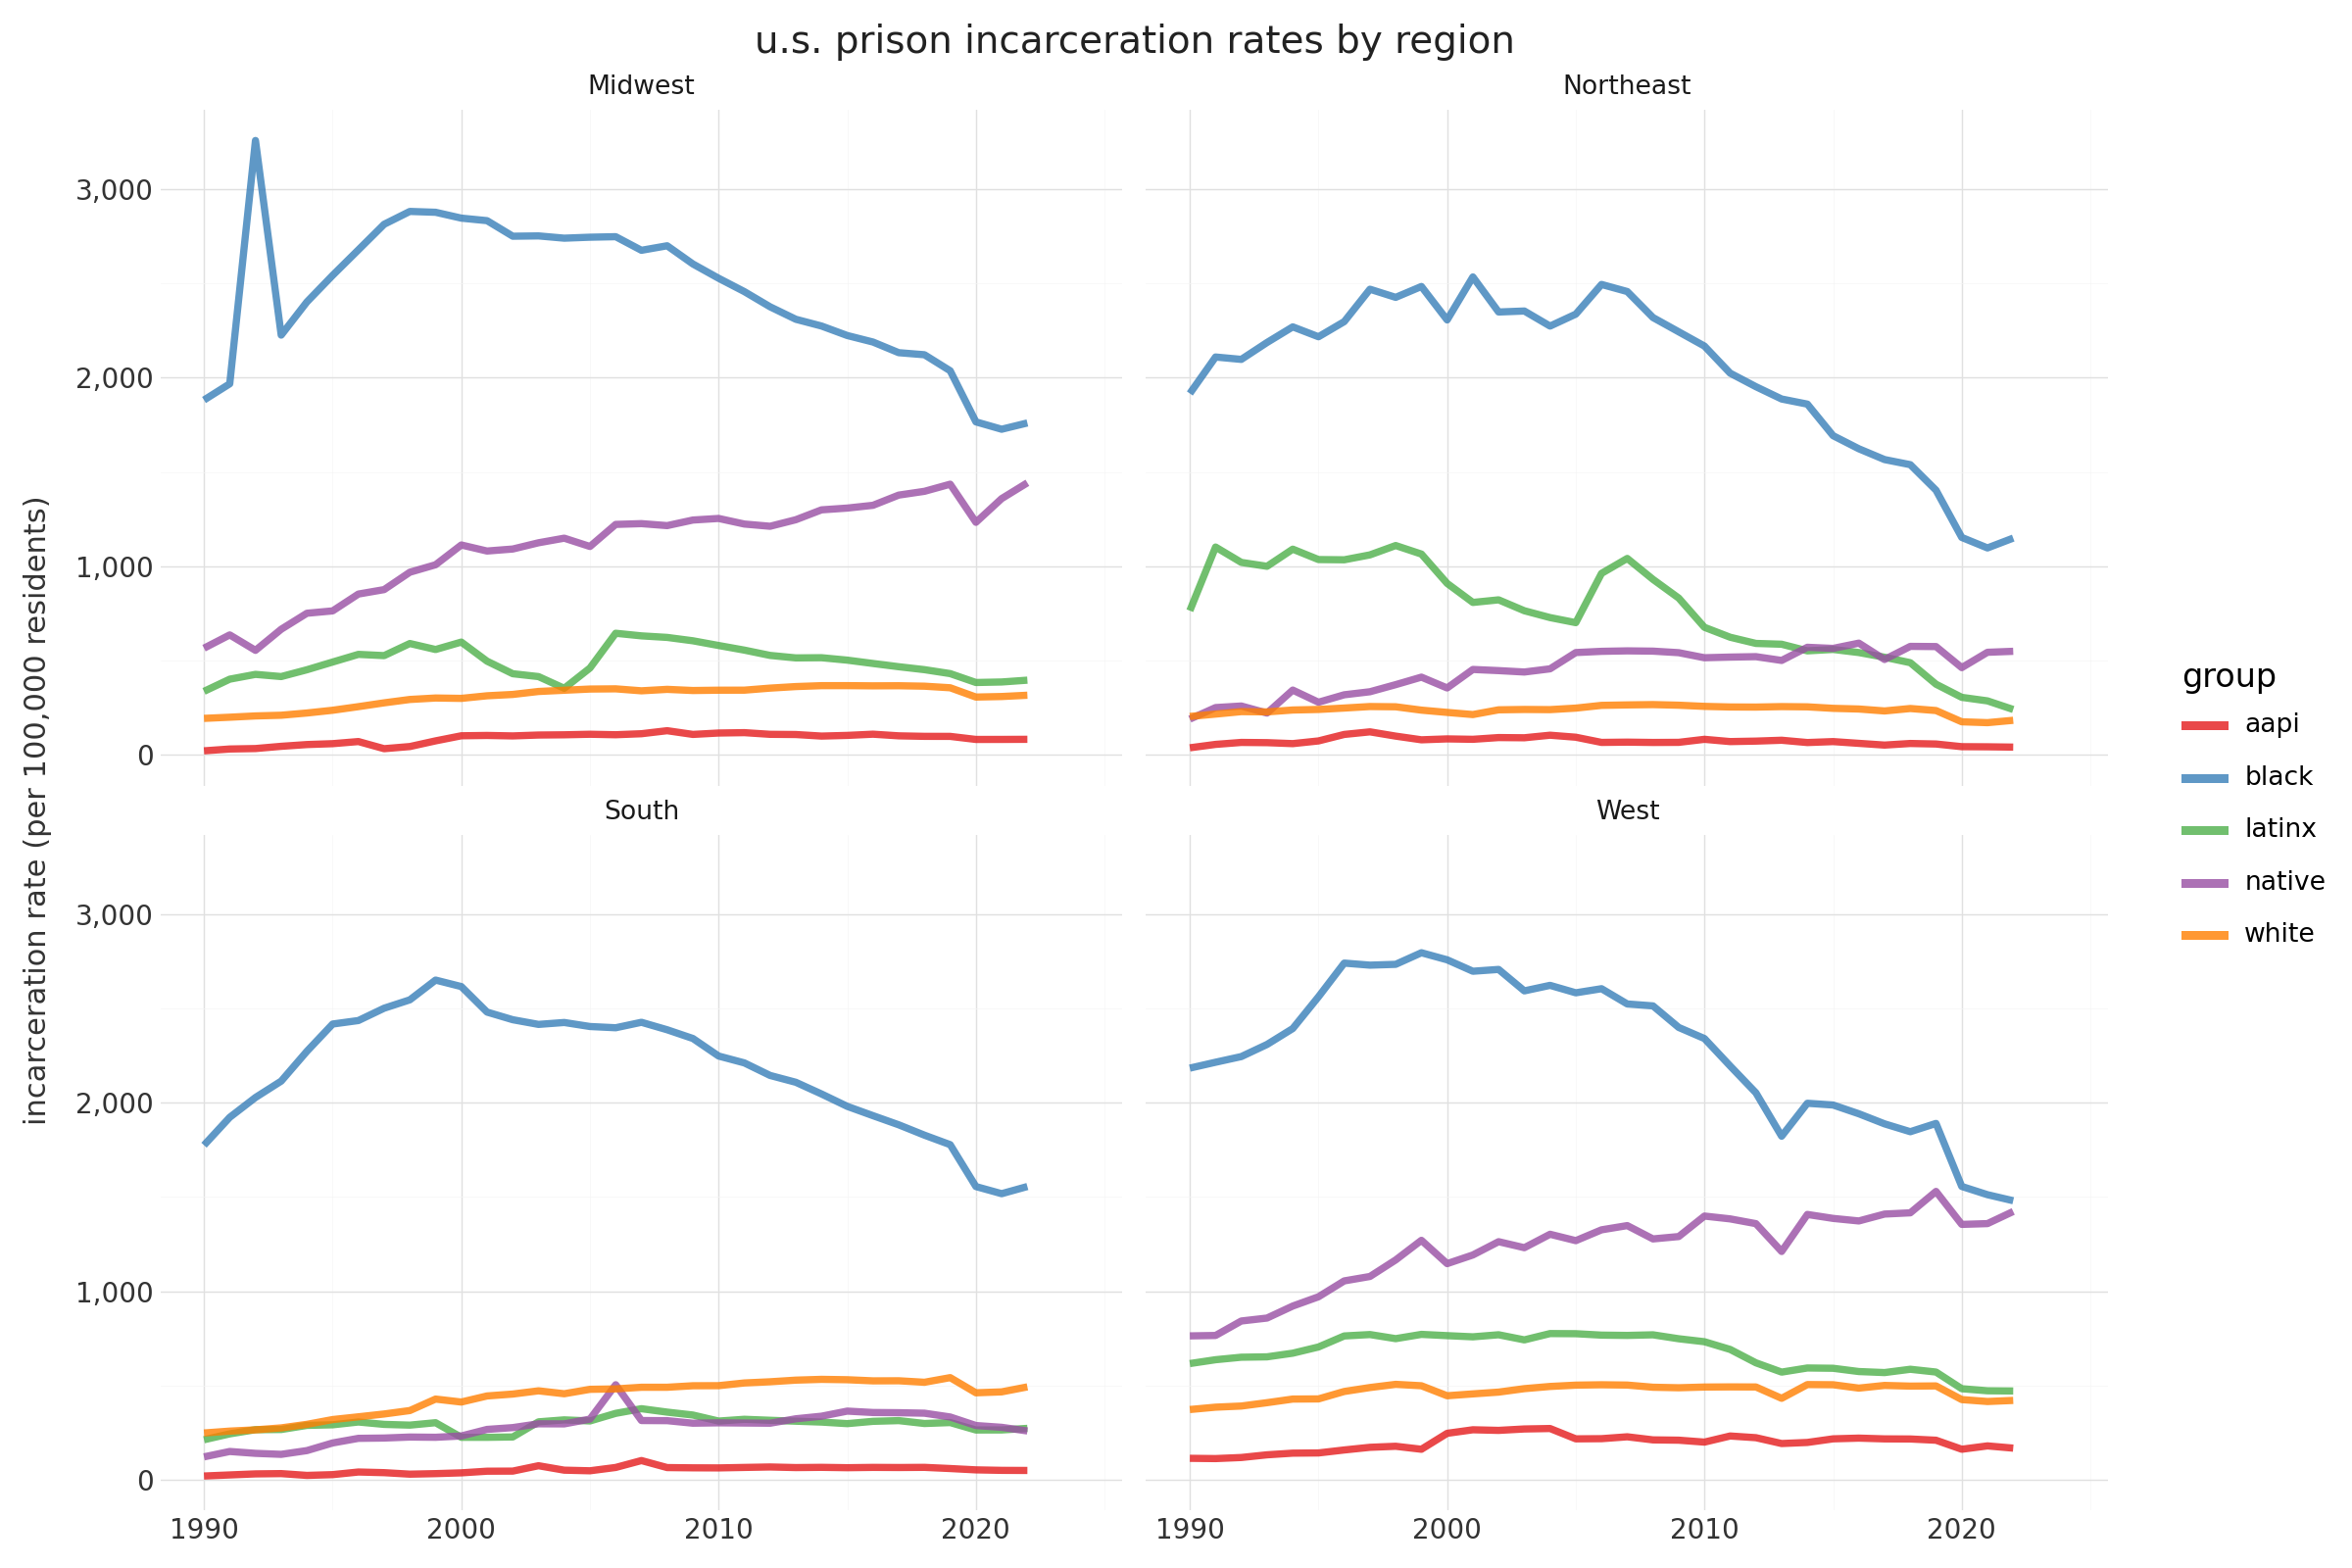

In [37]:
df = (
    data
    .select(base_cols + prison_pop_rate_cols)
    .filter(pl.col('state_abbr') != 'FED')
    .filter(pl.col('state_abbr') != 'US')
    .rename({c: c.removesuffix('_prison_pop_rate') for c in prison_pop_rate_cols})
    .drop(pl.col('total'))
    .unpivot(
        index=base_cols,
        variable_name='group',
        value_name='value',
    )
    .group_by('year', 'region', 'group')
    .agg(pl.col('value').mean())
)

(
    ggplot(df, aes(x='year', y='value'))
    + geom_line(aes(color='group'), size=1.5, alpha=0.8)
    + facet_wrap('region')
    + scale_x_continuous(limits=(1990,2024))
    + scale_y_continuous(limits=(0,None), labels=comma_format())
    + labs(
        title='u.s. prison incarceration rates by region',
        x='',
        y=f'incarceration rate (per 100,000 residents)',
    )
    #+ scale_color_manual(values=jco_colors)
    + scale_color_brewer(type='qual', palette='Set1')
    + bbc_style_theme
    + theme(figure_size=(12,8))
)